In [1]:
#getting the required libreries
import math
import pandas as pd
import seaborn as sns
import numpy as np
from io import StringIO 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.tools as tls
from plotly.offline import iplot
import cufflinks as cf
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
#fetching country codes
ccode = pd.read_excel('C:\\Hiral\\BIT\\Python\\Numpy_pandas_JalpaMam\\Zomato Case Study\\Country-Code.xlsx')
ccode

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
print("Null or Missing Values:",ccode.isnull().sum())
print("Duplicate Data rows:",ccode.duplicated().sum())

Null or Missing Values: Country Code    0
Country         0
dtype: int64
Duplicate Data rows: 0


In [4]:
#fetching Zomato Dataset
zomato = pd.read_excel('C:\\Hiral\\BIT\\Python\\Numpy_pandas_JalpaMam\\Zomato Case Study\\zomato.xlsx')
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
#fetching file1 to file5
file1 = pd.read_json('C:\\Hiral\\BIT\\Python\\Numpy_pandas_JalpaMam\\Zomato Case Study\\file1.json')
file2 = pd.read_json('C:\\Hiral\\BIT\\Python\\Numpy_pandas_JalpaMam\\Zomato Case Study\\file2.json')
file3 = pd.read_json('C:\\Hiral\\BIT\\Python\\Numpy_pandas_JalpaMam\\Zomato Case Study\\file3.json')
file4 = pd.read_json('C:\\Hiral\\BIT\\Python\\Numpy_pandas_JalpaMam\\Zomato Case Study\\file4.json')
file5 = pd.read_json('C:\\Hiral\\BIT\\Python\\Numpy_pandas_JalpaMam\\Zomato Case Study\\file5.json')
files = pd.concat([file1,file2,file3,file4,file5])
files

,results_found,restaurants,results_shown,results_start,message,code,status
0,17151.0,"[{'restaurant': {'has_online_delivery': 1, 'ph...",20.0,1.0,NaN,NaN,NaN
1,4748.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
2,13786.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
3,10224.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
4,7039.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,NaN,API limit exceeded,440.0,
296,NaN,NaN,NaN,NaN,API limit exceeded,440.0,
297,NaN,NaN,NaN,NaN,API limit exceeded,440.0,
298,NaN,NaN,NaN,NaN,API limit exceeded,440.0,


In [6]:
print(zomato.shape)
zomato.info()

(9551, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to 

In [7]:
zomato=pd.merge(zomato,ccode,on='Country Code',how='left')
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [8]:
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

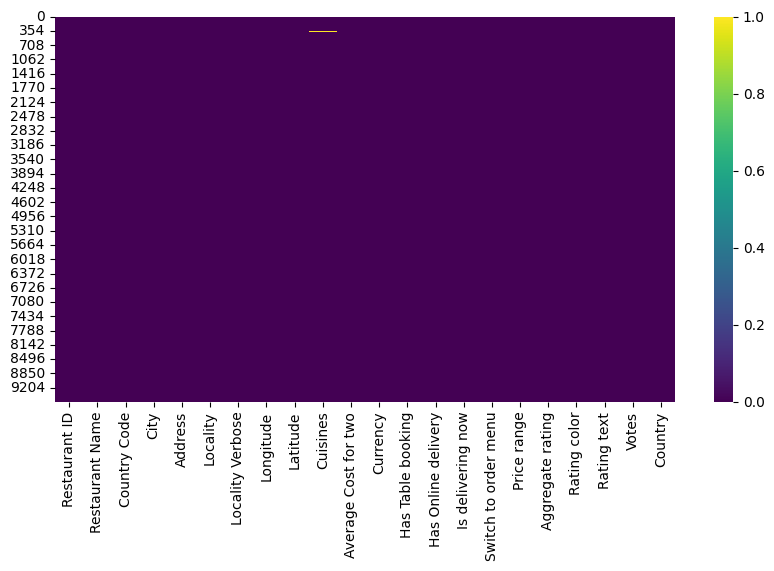

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(zomato.isnull(),cmap='viridis')
plt.show()

In [10]:
zomato.loc[zomato['Cuisines'].isnull(),['Restaurant Name','Country Code','Country','Cuisines']]

,Restaurant Name,Country Code,Country,Cuisines
84,Cookie Shoppe,216,United States,NaN
87,Pearly's Famous Country Cookng,216,United States,NaN
94,Jimmie's Hot Dogs,216,United States,NaN
297,Corkscrew Cafe,216,United States,NaN
328,Dovetail,216,United States,NaN
346,HI Lite Bar & Lounge,216,United States,NaN
368,Hillstone,216,United States,NaN
418,Leonard's Bakery,216,United States,NaN
455,Tybee Island Social Club,216,United States,NaN


In [11]:
zomato.drop(['Restaurant ID','Locality Verbose'],axis=1,inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9542 non-null   object 
 8   Average Cost for two  9551 non-null   int64  
 9   Currency              9551 non-null   object 
 10  Has Table booking     9551 non-null   object 
 11  Has Online delivery   9551 non-null   object 
 12  Is delivering now     9551 non-null   object 
 13  Switch to order menu  9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [12]:
zomato['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

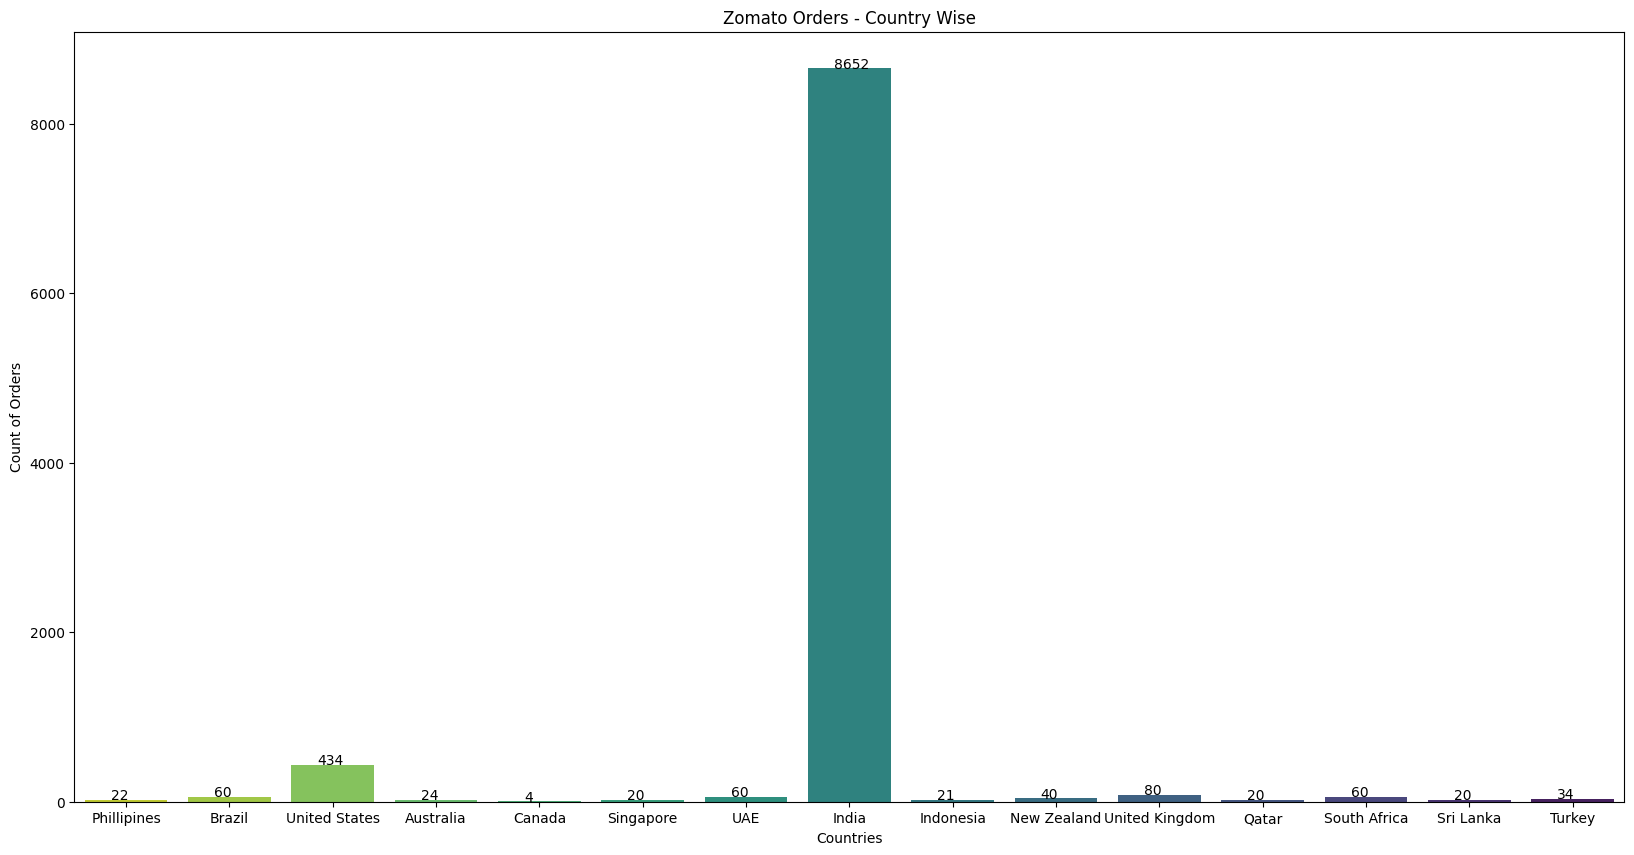

In [13]:
country = zomato['Country'].value_counts()
plt.figure(figsize=(20,10))
cAx = sns.countplot(x='Country',data=zomato,palette='viridis_r')
cAx.set(
   title='Zomato Orders - Country Wise',
   xlabel='Countries',
   ylabel='Count of Orders',
)
#cAx.legend(title='Countries', labels=country.index)
for p in cAx.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    cAx.annotate(h, (x+0.25, h+2))
plt.show()

In [14]:
zomato.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


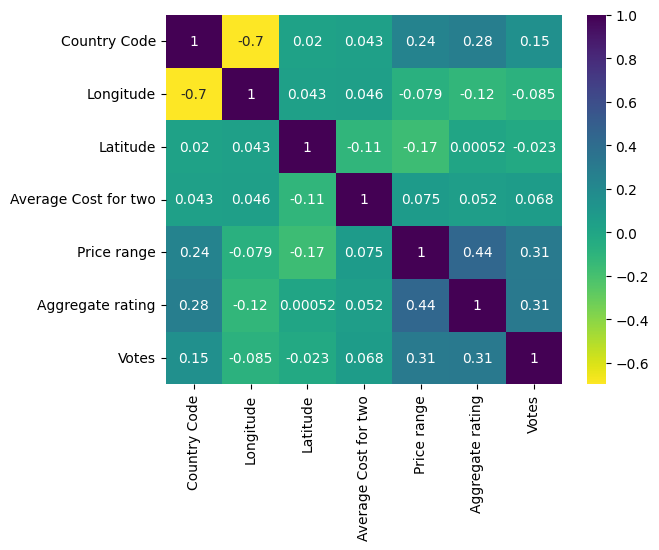

In [15]:
sns.heatmap(data=zomato.corr(),cmap='viridis_r',annot=True)
plt.show()

In [16]:
zomato['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

9551


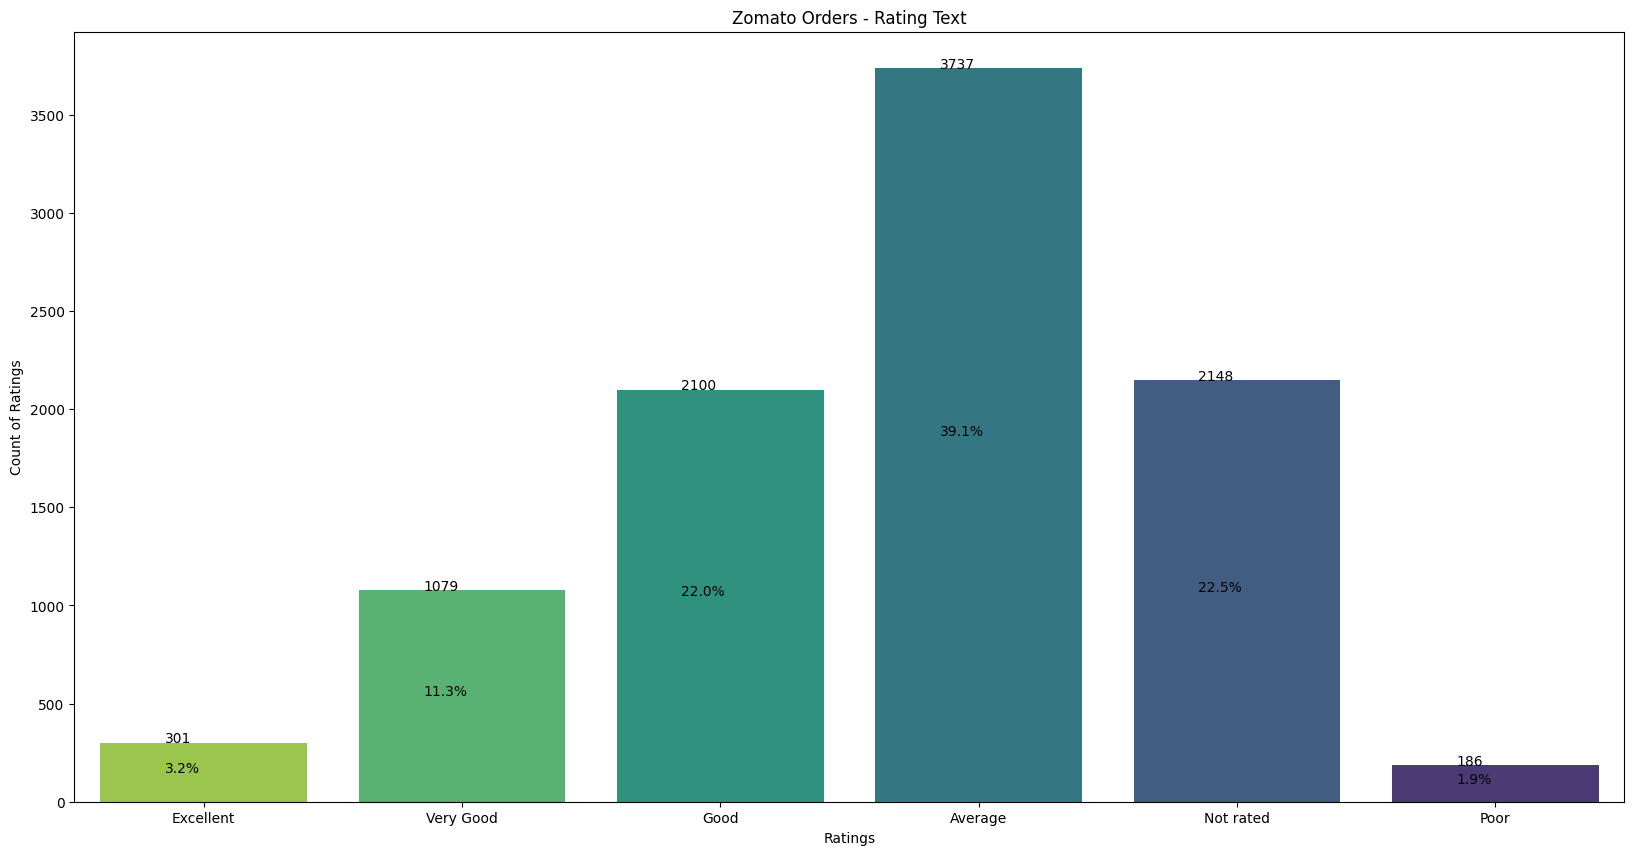

In [17]:
rating = zomato['Rating text'].value_counts()
total = zomato['Rating text'].count()
print(total)
plt.figure(figsize=(20,10))
rAx = sns.countplot(x='Rating text',data=zomato,palette='viridis_r')
rAx.set(
   title='Zomato Orders - Rating Text',
   xlabel='Ratings',
   ylabel='Count of Ratings',
)
#rAx.legend(title='Countries', labels=list(rating.index))
for p in rAx.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    rAx.annotate(h, (x+0.25, h))
    rAx.annotate(str(round((h*100)/total,1)) + '%', (x+0.25, h/2))
plt.show()

9551


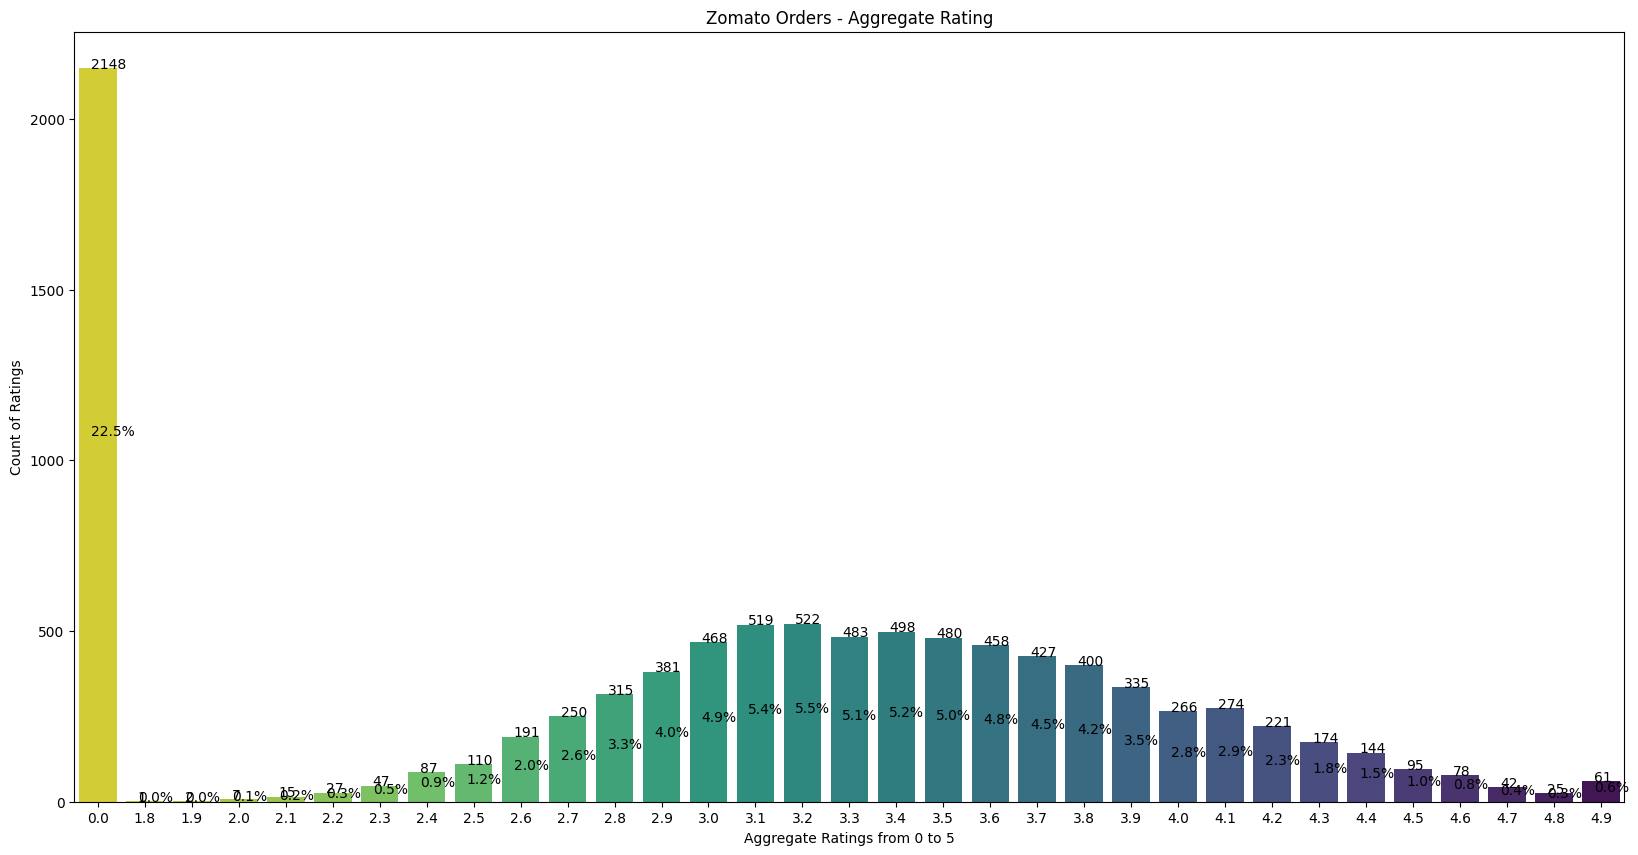

In [18]:
agr = zomato['Aggregate rating'].value_counts()
total = zomato['Aggregate rating'].count()
print(total)
plt.figure(figsize=(20,10))
rAx = sns.countplot(x='Aggregate rating',data=zomato,palette='viridis_r')
rAx.set(
   title='Zomato Orders - Aggregate Rating',
   xlabel='Aggregate Ratings from 0 to 5',
   ylabel='Count of Ratings',
)
#rAx.legend(title='Countries', labels=list(rating.index))
for p in rAx.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    rAx.annotate(h, (x+0.25, h))
    rAx.annotate(str(round((h*100)/total,1)) + '%', (x+0.25, h/2))
plt.show()

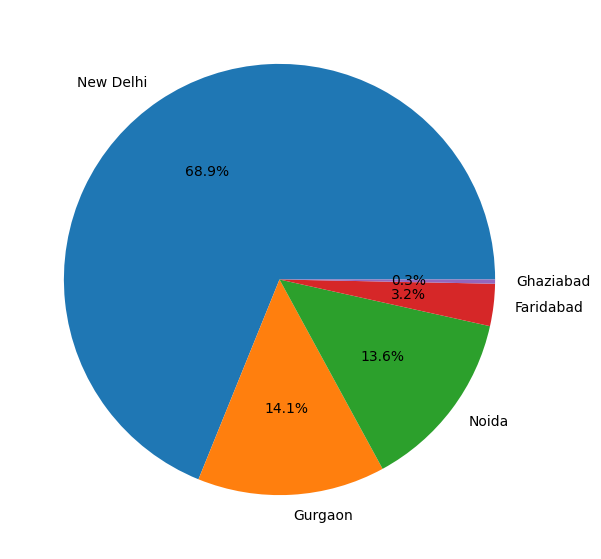

In [19]:
plt.figure(figsize=(7,7))
india = zomato[zomato['Country Code']==1].groupby(['City']).size().sort_values(ascending =False)
plt.pie(india[:5],labels=india[:5].index,autopct='%1.1f%%')
plt.show()

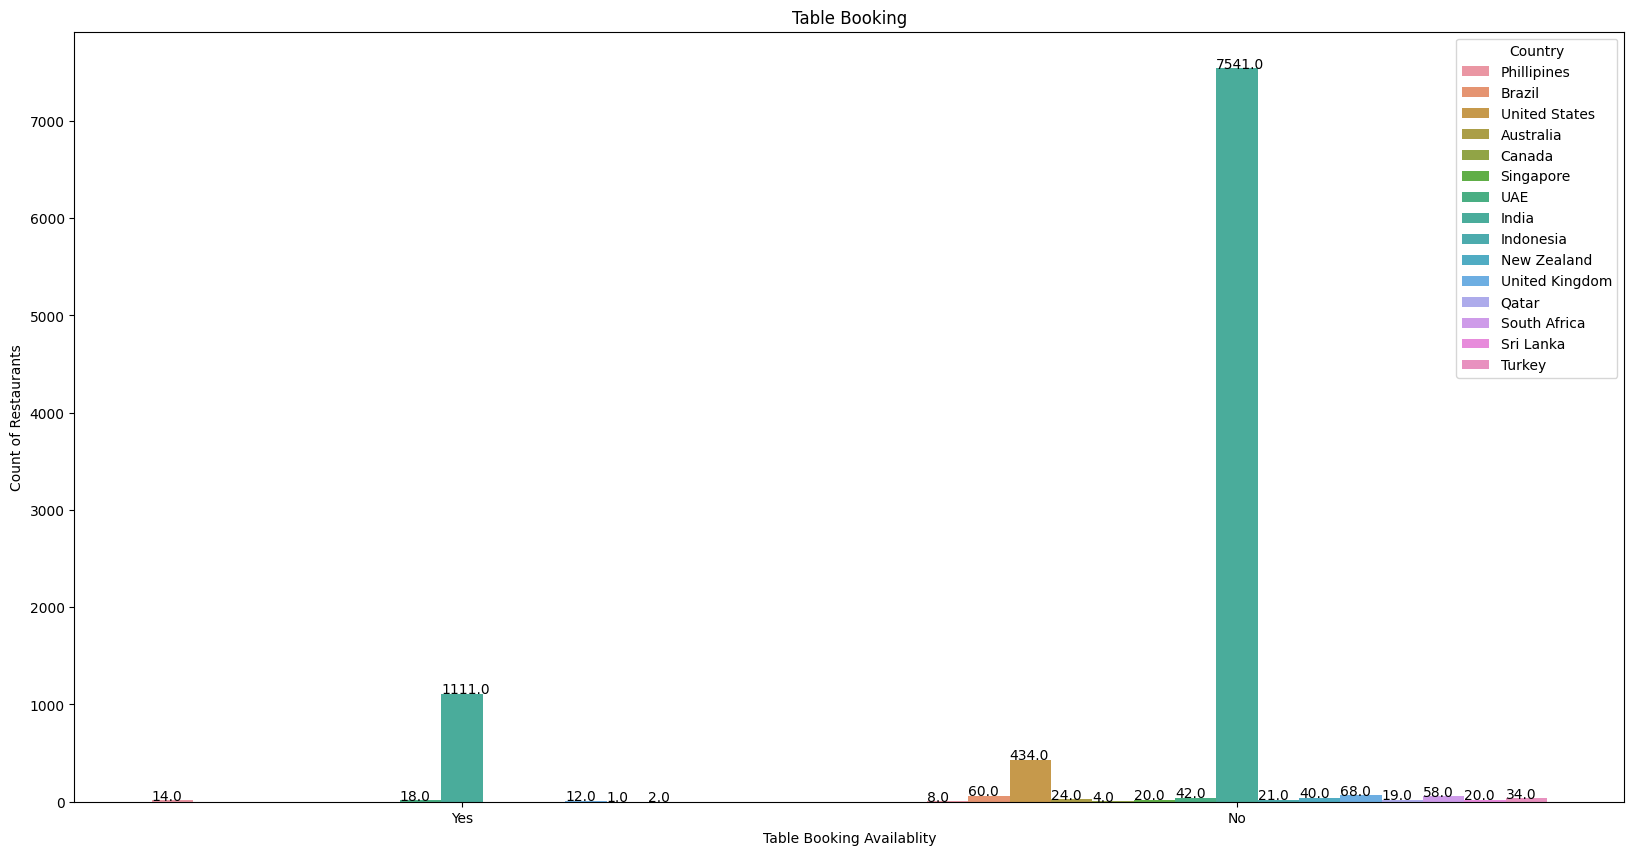

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
total = zomato['Has Table booking'].count()
tableAx = sns.countplot(x='Has Table booking',hue='Country',data=zomato)
tableAx.set(
   title='Table Booking',
   xlabel='Table Booking Availablity',
   ylabel='Count of Restaurants',
   #xticklabels = ['First','Second','Third']
)
#tableAx.legend(title='Survival', labels=['Dead','Alive'])
for p in tableAx.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    tableAx.annotate(h, (x, h))
    #tableAx.annotate(str(round((h*100)/total,1)) + '%', (x+0.35, h/2))
plt.show()
zomato['Has Table booking'].value_counts()

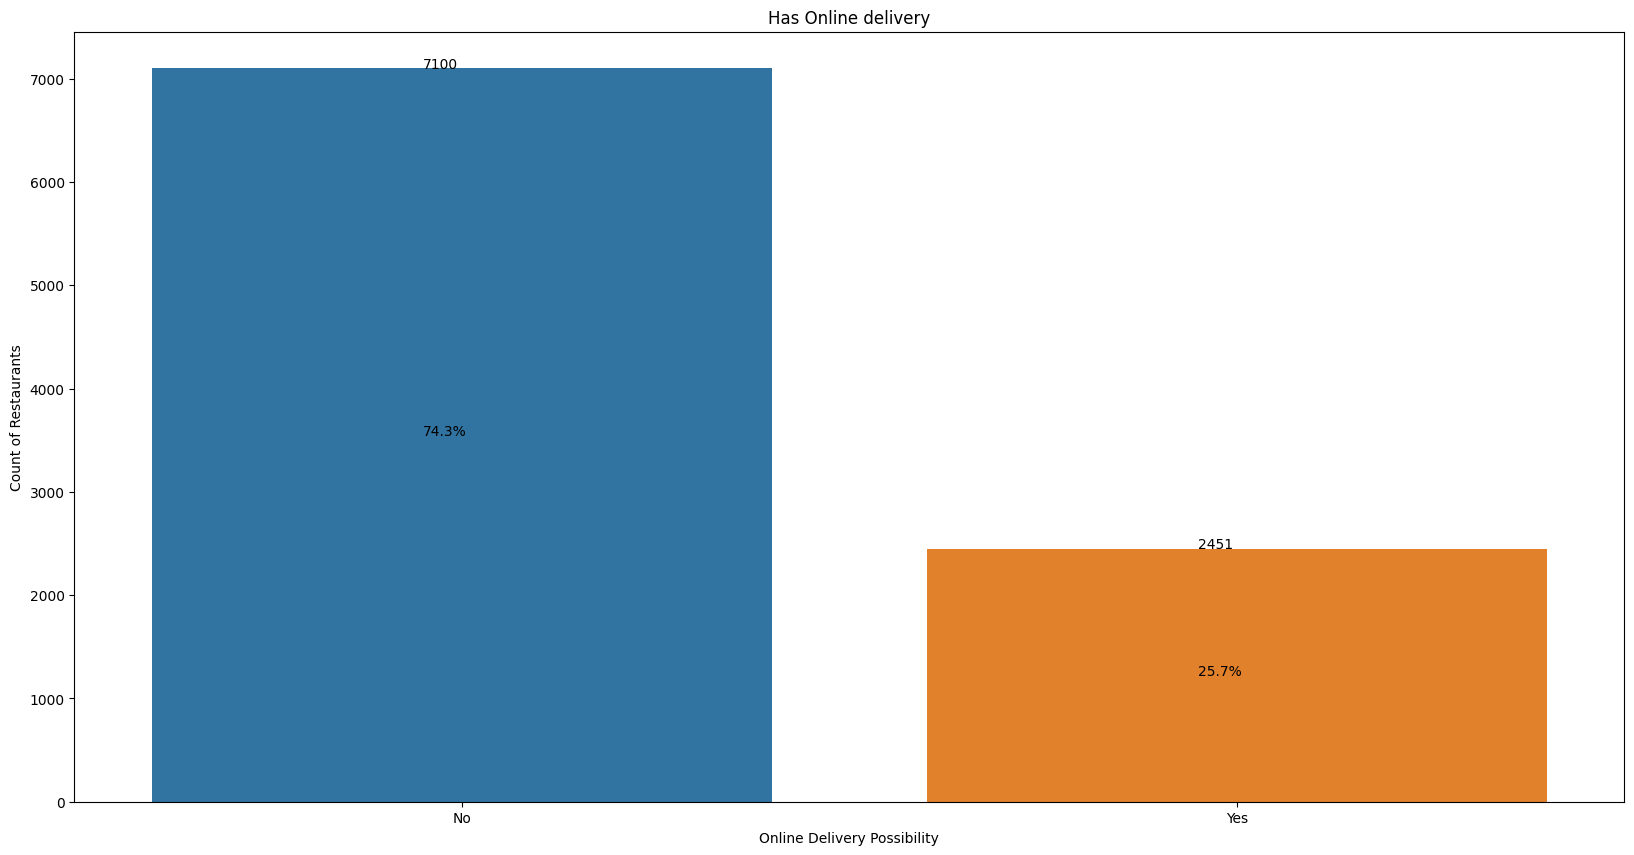

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
total = zomato['Has Online delivery'].count()
onlineAx = sns.countplot(x='Has Online delivery',data=zomato)
onlineAx.set(
   title='Has Online delivery',
   xlabel='Online Delivery Possibility',
   ylabel='Count of Restaurants',
   #xticklabels = ['First','Second','Third']
)
#onlineAx.legend(title='Survival', labels=['Dead','Alive'])
for p in onlineAx.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    onlineAx.annotate(h, (x+0.35, h))
    onlineAx.annotate(str(round((h*100)/total,1)) + '%', (x+0.35, h/2))
plt.show()
zomato['Has Online delivery'].value_counts()

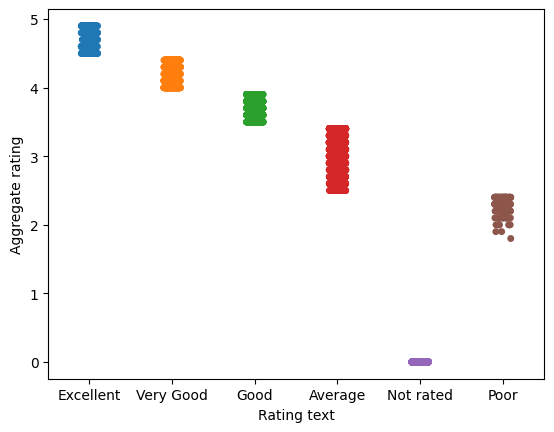

In [22]:
sns.stripplot(x=zomato['Rating text'],y=zomato['Aggregate rating'])
plt.show()

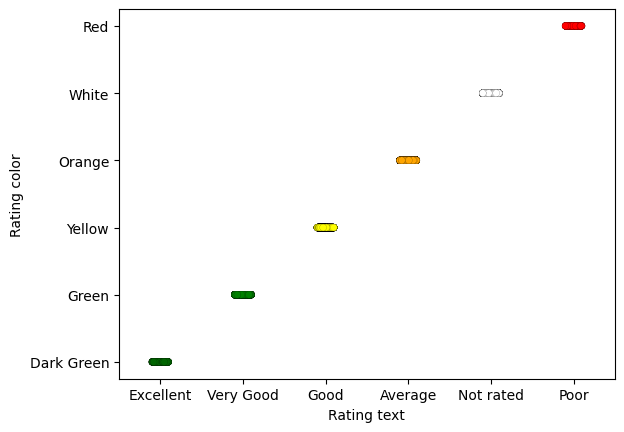

In [23]:
sns.stripplot(x=zomato['Rating text'],y=zomato['Rating color'],palette=['darkgreen','green','yellow','orange','white','red'],
              edgecolor='black',linewidth=0.1)
plt.show()

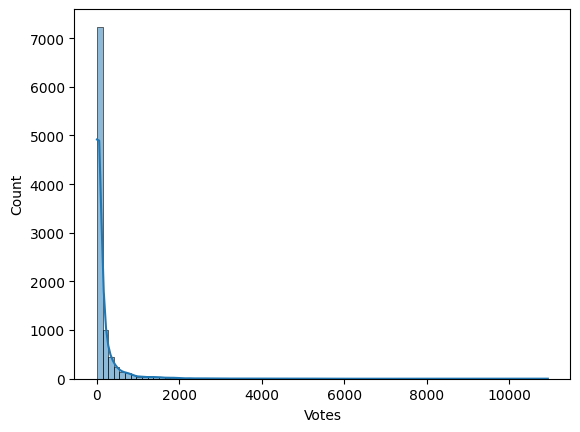

In [24]:
sns.histplot(x='Votes',data=zomato,palette='rainbow', bins=80,kde=True)
plt.show()

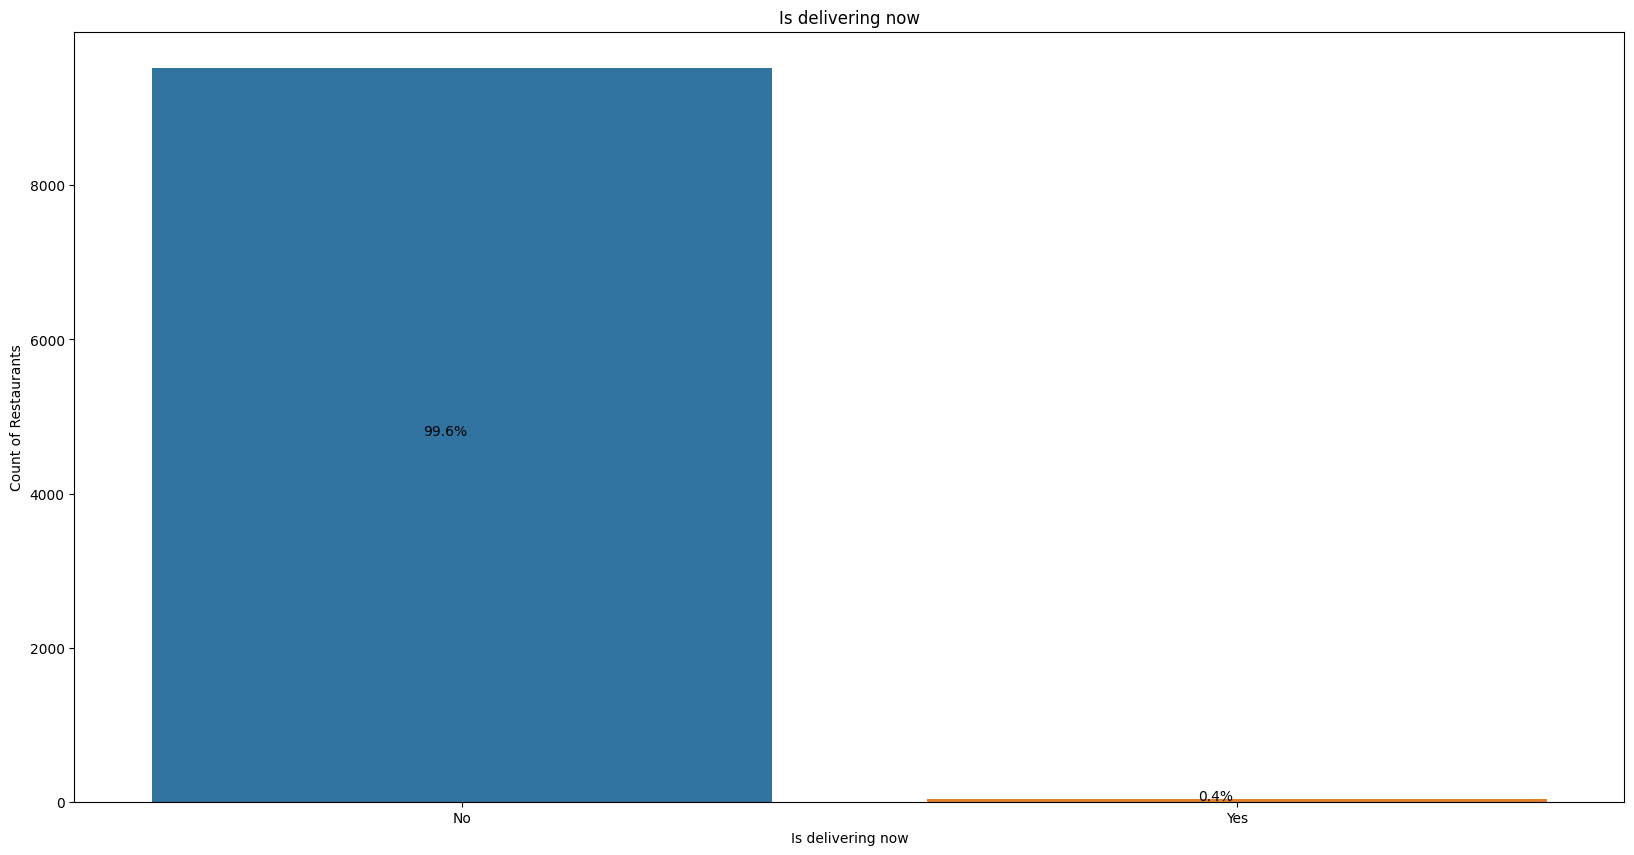

In [40]:
#zomato[['Country']==1]['Is delivering now'].value_counts()
fig, ax = plt.subplots(figsize=(20, 10))
total = zomato['Is delivering now'].count()
onlineAx = sns.countplot(x='Is delivering now',data=zomato)
onlineAx.set(
   title='Is delivering now',
   xlabel='Is delivering now',
   ylabel='Count of Restaurants',
   #xticklabels = ['First','Second','Third']
)
#onlineAx.legend(title='Survival', labels=['Dead','Alive'])
for p in onlineAx.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    #onlineAx.annotate(h, (x+0.35, h+5))
    onlineAx.annotate(str(round((h*100)/total,1)) + '%', (x+0.35, h/2))
plt.show()


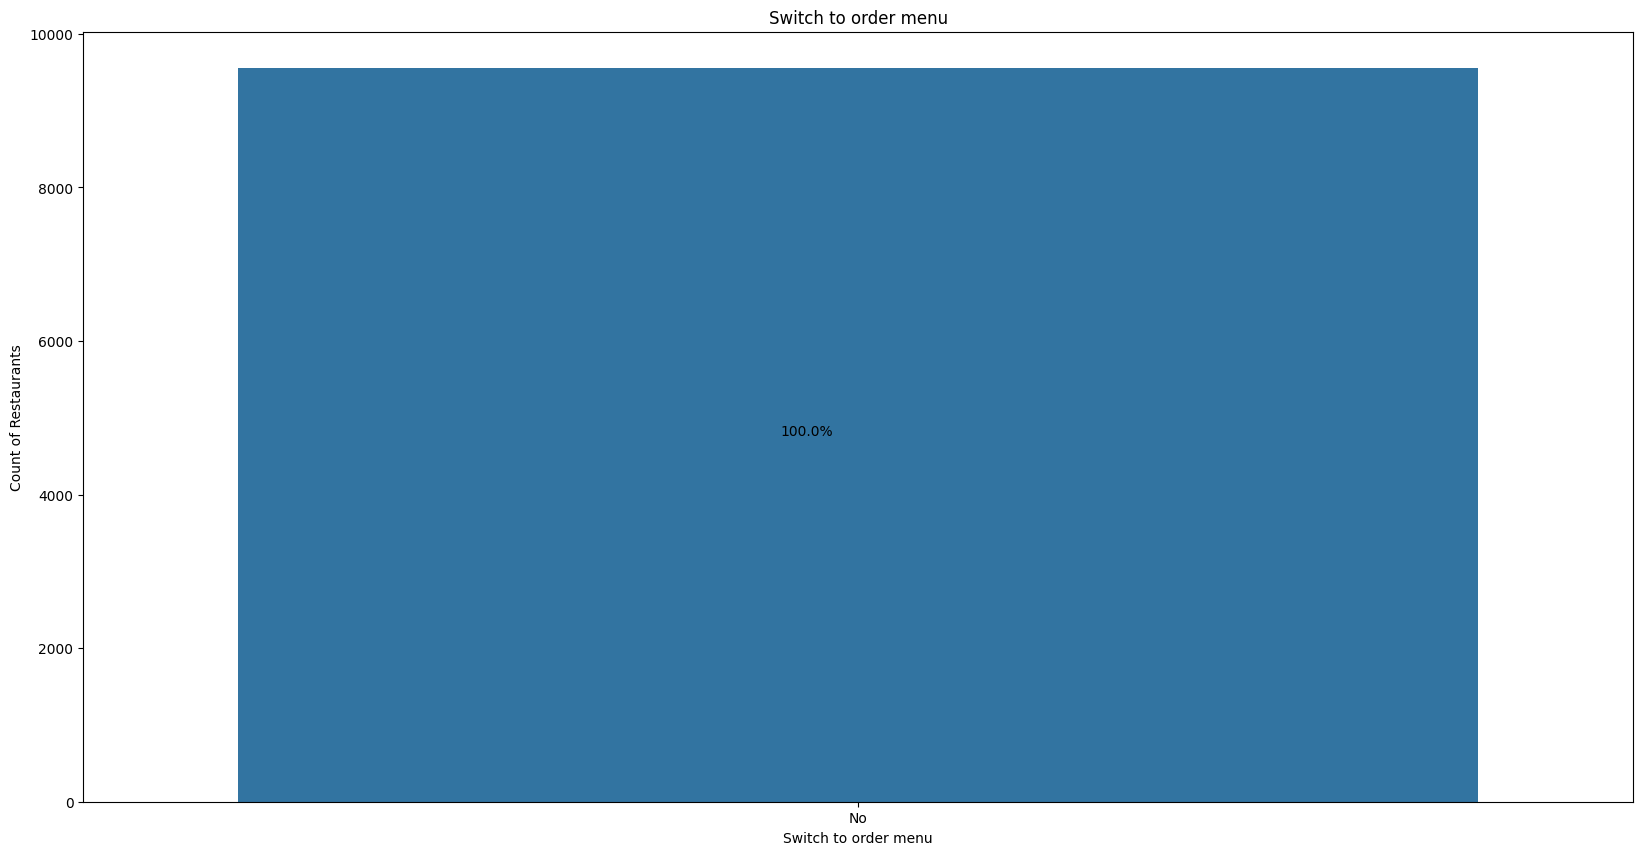

In [41]:
#zomato[['Country']==1]['Switch to order menu'].value_counts()
fig, ax = plt.subplots(figsize=(20, 10))
total = zomato['Switch to order menu'].count()
switchAx = sns.countplot(x='Switch to order menu',data=zomato)
switchAx.set(
   title='Switch to order menu',
   xlabel='Switch to order menu',
   ylabel='Count of Restaurants',
   #xticklabels = ['First','Second','Third']
)
#onlineAx.legend(title='Survival', labels=['Dead','Alive'])
for p in switchAx.patches:
    h = p.get_height()
    x = p.get_x()
    w = p.get_width()
    #switchAx.annotate(h, (x+0.35, h+5))
    switchAx.annotate(str(round((h*100)/total,1)) + '%', (x+0.35, h/2))
plt.show()

In [50]:
loca = zomato.groupby(['Country'])['Locality'].value_counts()
loca

Country        Locality       
Australia      Hepburn Springs    2
               Armidale           1
               Balingup           1
               Beechworth         1
               Dicky Beach        1
                                 ..
United States  Vernonia           1
               Weirton            1
               Winchester Bay     1
               Windermere         1
               Ybor City          1
Name: Locality, Length: 1208, dtype: int64